In [1]:
#Uploading the Dataset
# BEGIN_YOUR_CODE
from google.colab import files
uploaded = files.upload()
# END_YOUR_CODE

Saving penguins.csv to penguins.csv


In [2]:
# Reading the Dataset
import io
import pandas as pd
import numpy as np
data=pd.read_csv(io.BytesIO(uploaded['penguins.csv']))
data.info

<bound method DataFrame.info of        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
3       Adelie  Torgersen             NaN            NaN                NaN   
4       Adelie  Torgersen            36.7           19.3              193.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g   

In [3]:
#Main Statistics of the Dataset 

print("The Shape of the Dataset is:", data.shape)
data=data.dropna()
print("The Shape of the Dataset after removing the [NAN values] is:", data.shape)

The Shape of the Dataset is: (344, 8)
The Shape of the Dataset after removing the [NAN values] is: (333, 8)


In [4]:
#Main Statistics of the Dataset
print("The statistical analysis of the Dataset is:","\n", data.describe())

The statistical analysis of the Dataset is: 
        bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   333.000000  
mean   2008.042042  
std       0.812944  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  


In [5]:
#Dataset preprocessing
nominal_1=pd.get_dummies(data.island)
data=pd.concat([data,nominal_1],axis=1)
data=data.drop(['island'], axis=1)
nominal_1=pd.get_dummies(data.species)
data=pd.concat([data,nominal_1],axis=1)
data=data.drop(['species'], axis=1)
data=data.drop(['year'], axis=1)
data.sex[data.sex=='male']=1
data.sex[data.sex=='female']=0
data.head(10)

<ipython-input-5-b11d2a39394f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sex[data.sex=='male']=1
<ipython-input-5-b11d2a39394f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sex[data.sex=='female']=0


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen,Adelie,Chinstrap,Gentoo
0,39.1,18.7,181.0,3750.0,1,0,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,0,0,0,1,1,0,0
2,40.3,18.0,195.0,3250.0,0,0,0,1,1,0,0
4,36.7,19.3,193.0,3450.0,0,0,0,1,1,0,0
5,39.3,20.6,190.0,3650.0,1,0,0,1,1,0,0
6,38.9,17.8,181.0,3625.0,0,0,0,1,1,0,0
7,39.2,19.6,195.0,4675.0,1,0,0,1,1,0,0
12,41.1,17.6,182.0,3200.0,0,0,0,1,1,0,0
13,38.6,21.2,191.0,3800.0,1,0,0,1,1,0,0
14,34.6,21.1,198.0,4400.0,1,0,0,1,1,0,0


In [6]:
#print the MAX and MIN value of some colums
print("The max value of [bill_length_mm] column is:", data['bill_length_mm'].max())
print("The max value of [bill_depth_mm] column is:", data['bill_depth_mm'].max())
print("The max value of [flipper_length_mm] column is:", data['flipper_length_mm'].max())
print("The max value of [body_mass_g] column is:", data['body_mass_g'].max(), "\n")
print("The min value of [bill_length_mm] column is:", data['bill_length_mm'].min())
print("The min value of [bill_depth_mm] column is:", data['bill_depth_mm'].min())
print("The min value of [flipper_length_mm] column is:", data['flipper_length_mm'].min())
print("The min value of [body_mass_g] column is:", data['body_mass_g'].min())

The max value of [bill_length_mm] column is: 59.6
The max value of [bill_depth_mm] column is: 21.5
The max value of [flipper_length_mm] column is: 231.0
The max value of [body_mass_g] column is: 6300.0 

The min value of [bill_length_mm] column is: 32.1
The min value of [bill_depth_mm] column is: 13.1
The min value of [flipper_length_mm] column is: 172.0
The min value of [body_mass_g] column is: 2700.0


In [7]:
# Normalize the data
columns_to_normalize = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for column in columns_to_normalize:
  data[column]=data[column].apply(lambda x:(x-data[column].min())/(data[column].max()-data[column].min()))
data.head(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Biscoe,Dream,Torgersen,Adelie,Chinstrap,Gentoo
0,0.254545,0.666667,0.152542,0.291667,1,0,0,1,1,0,0
1,0.269091,0.511905,0.237288,0.305556,0,0,0,1,1,0,0
2,0.298182,0.583333,0.389831,0.152778,0,0,0,1,1,0,0
4,0.167273,0.738095,0.355932,0.208333,0,0,0,1,1,0,0
5,0.261818,0.892857,0.305085,0.263889,1,0,0,1,1,0,0


In [8]:
#spliting the Data
target='sex'
target_encoding={'male': 0, 'female': 1}
data[target]=data[target].replace(target_encoding)
y_data=data[target]
X_data=data.drop(columns=[target])
divider = int(((len(X_data) * 80) / 100) + 1)
X_train = X_data[:divider]
X_test = X_data[divider:]
y_train = y_data[:divider]
y_test = y_data[divider:]
print("The shape of [X_train] is:", X_train.shape)
print("The shape of [y_train] is:", y_train.shape)
print("The shape of [X_test] is:", X_test.shape)
print("The shape of [y_test] is:", y_test.shape)

The shape of [X_train] is: (267, 10)
The shape of [y_train] is: (267,)
The shape of [X_test] is: (66, 10)
The shape of [y_test] is: (66,)


In [9]:
import pickle
import numpy as np
import pandas as pd

class LogisticRegression():

    # Initialize model with some default values
    def __init__(self, learning_rate=1e-5, n_iterations=100000):
        self.bias=0
        self.weights=None
        self.losses=[]
        self.n_samples=None
        self.n_features=None
        self.learning_rate=learning_rate
        self.n_iterations=n_iterations
    
    # Apply logistic regression activation function
    def sigmoid(self, z):
        return 1.0/(1 + np.exp(-z))
    
    # Find the loss or cost of objective function
    def cost(self,X,y):
        linear_prediction=self.bias+np.dot(X,self.weights)   
        logistic_prediction=self.sigmoid(linear_prediction)   
        
        step1=y* np.log(logistic_prediction)
        step2=(1-y)*np.log(1-logistic_prediction)
        final=-step1-step2
        return np.mean(final)
    
    # Generate new weights and bias
    def gradient_descent(self, X, y):
        linear_prediction=self.bias+np.dot(X,self.weights)   
        logistic_prediction=self.sigmoid(linear_prediction)   
        delta=logistic_prediction - y

        db=np.sum(delta)/self.n_samples
        dW=np.dot(X.T,delta)/self.n_samples

        self.bias=self.bias-(self.learning_rate*db)
        self.weights=self.weights-(self.learning_rate*dW)   

    # Fit the data until given the number of iterations 
    def fit(self, X, y):
        self.n_samples,self.n_features=X.shape
        self.weights=np.zeros(self.n_features)

        for _ in range(self.n_iterations):
            self.gradient_descent(X, y)
            self.losses.append(self.cost(X, y))
        return self.weights, self.losses

    # Predict the test data
    def predict(self, X):
        linear_prediction = self.bias + np.dot(X, self.weights)
        logistic_prediction = self.sigmoid(linear_prediction)
        y_prediction = [0 if i <= 0.5 else 1 for i in logistic_prediction]
        return y_prediction

# Calculate the accuracy
def accuracy(y_prediction, y_test):
    return np.sum(y_prediction==y_test)/len(y_test)



logistic_regression=LogisticRegression(learning_rate=0.05, n_iterations=60000)

weights, losses = logistic_regression.fit(X_train, y_train.to_numpy())
with open( "my_pickle.p", "ba+" ) as fp:
    pickle.dump(weights, fp)
print('\nLast iteration Loss :\n', losses)

y_prediction = logistic_regression.predict(X_test)
accuracy = accuracy(y_prediction, y_test)
print("\n" "The accuracy of this algorithm is %s percent" %(accuracy*100))


Last iteration Loss :
 [0.6927845627642464, 0.6924316632191416, 0.6920878229771894, 0.6917524286417568, 0.6914249092348248, 0.6911047332767271, 0.6907914060640378, 0.6904844671326368, 0.6901834878937518, 0.6898880694315278, 0.6895978404513666, 0.6893124553689666, 0.6890315925306122, 0.6887549525558756, 0.6884822567944539, 0.6882132458894052, 0.6879476784395501, 0.6876853297542782, 0.68742599069445, 0.687169466593499, 0.6869155762532335, 0.6866641510092097, 0.6864150338608865, 0.6861680786621, 0.6859231493676976, 0.6856801193324544, 0.6854388706586539, 0.6851992935889725, 0.6849612859415246, 0.6847247525841527, 0.6844896049452369, 0.6842557605584934, 0.6840231426394014, 0.6837916796910656, 0.683561305137463, 0.6833319569821796, 0.6831035774908588, 0.6828761128957177, 0.6826495131205939, 0.6824237315250972, 0.682198724666536, 0.6819744520783845, 0.6817508760641362, 0.6815279615054783, 0.6813056756837865, 0.6810839881140172, 0.6808628703901307, 0.6806422960412495, 0.680422240397797, 0.68

In [10]:
pickle.load(open( "my_pickle.p", "rb" ))

array([ 9.82181775, 10.2479207 ,  1.36885136, 16.75381951, -3.35601964,
       -3.07116081, -3.67448529, -0.29249663, -3.63059364, -6.17857547])

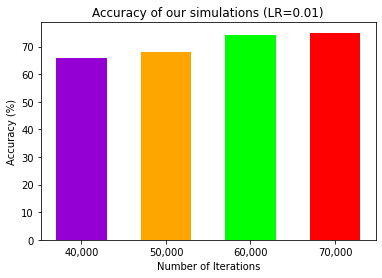

In [11]:
import matplotlib.pyplot as plt
left=[x  for x in range(1,5)]
height=[66,68,74,75]
species_label = ["40,000","50,000","60,000","70,000"]   
plt.bar(left, height, tick_label = species_label, width = 0.6, color = ["darkviolet", "orange", "lime","red"])   
plt.xlabel("Number of Iterations")   
plt.ylabel("Accuracy (%)")   
plt.title("Accuracy of our simulations (LR=0.01)")   
plt.show()


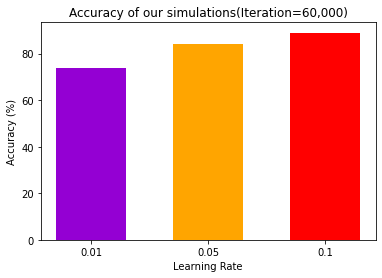

In [12]:
import matplotlib.pyplot as plt
left=[x  for x in range(1,4)]
height=[74,84,89]
species_label = ["0.01","0.05","0.1"]   
plt.bar(left, height, tick_label = species_label, width = 0.6, color = ["darkviolet", "orange", "red"])   
plt.xlabel("Learning Rate")   
plt.ylabel("Accuracy (%)")   
plt.title("Accuracy of our simulations(Iteration=60,000)")   
plt.show()